In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [11]:
params = {'n_estimators': range(10, 50, 10), 
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 7),
          'min_samples_split': range(2, 9, 2)}

clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [23]:
X = df.drop('class', axis=1)
y = df['class']
clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [26]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [28]:
best_clf = clf.best_estimator_

In [60]:
pd.DataFrame({'names': df.columns[0:-1], 'importances': best_clf.feature_importances_})\
    .sort_values(ascending=False, by='importances')

,names,importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [48]:
df.columns[1:-1]

Index(['cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [61]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [79]:
preds = clf.predict(df_test)

In [80]:
sum(preds)

976

In [90]:
answ = pd.read_csv('testing_y_mush.csv')

In [97]:
conf = pd.DataFrame({'y': answ['class'], 'preds': preds})

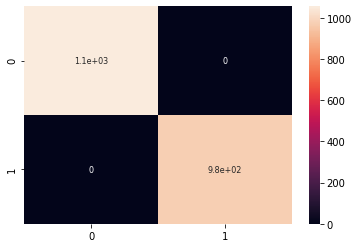

In [125]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(answ['class'], preds), annot=True,annot_kws={"size": 8})

In [143]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
df['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [147]:
fact = pd.factorize(df['class'])
df['class'] = fact[0]

In [148]:
fact[1]

Int64Index([0, 1, 2], dtype='int64')

In [149]:
df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,0,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,0,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [150]:
X = df.drop('class', axis=1)
y = df['class']

In [178]:
clf = RandomForestClassifier()

In [179]:
clf.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [181]:
pd.Series(clf.predict(df_test)).value_counts()

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 6 

In [156]:
clf.feature_importances_

array([0.14194709, 0.02248786, 0.06179883, 0.21060165, 0.        ,
       0.56316456])

In [189]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
X = df.drop('dangerous', axis=1)
y = df.dangerous

In [191]:
clf = RandomForestClassifier()
clf = RandomizedSearchCV(clf, params)
clf.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [193]:
pd.DataFrame({'y': clf.best_estimator_.feature_importances_, 'preds': X.columns})

,y,preds
0,0.001533,r
1,0.000594,phi
2,0.001495,peradventure_index
3,0.001473,dustiness
4,0.019370,black_hole_is_near
5,0.481564,buggers_were_noticed
6,0.493972,nearby_system_has_planemo


In [197]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [216]:
%%timeit 
df.mean(axis=0)

346 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [217]:
%%timeit 
df.apply('mean')

618 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [218]:
%%timeit
df.describe().loc['mean']

14.4 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [219]:
%%timeit
df.apply(np.mean)

1.78 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [221]:
%%timeit
np.mean()

109 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [227]:
%timeit np.mean(df['petal width'].values)

13.1 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [236]:
x = lambda x: x ** 2

%timeit x(df.values)

73.4 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
